In [33]:
import numpy as np
import math as m

print("task 1")
a = np.random.rand(10, 3)
print(a)
b = a.copy()
a = 0.5 - a
a[a < 0] *= -1
print (b[np.arange(10), np.argmin(a, axis = 1)])

task 1
[[0.21636944 0.79628664 0.37424061]
 [0.16784909 0.40807862 0.1303745 ]
 [0.01591167 0.70849988 0.10331383]
 [0.31554782 0.9220851  0.32793367]
 [0.05114246 0.63252651 0.06283701]
 [0.19854616 0.046254   0.40531544]
 [0.97888475 0.08839652 0.05075797]
 [0.22367411 0.0606289  0.84371985]
 [0.93364478 0.58616985 0.54677028]
 [0.57076755 0.97739506 0.08808667]]
[0.37424061 0.40807862 0.70849988 0.32793367 0.63252651 0.40531544
 0.08839652 0.22367411 0.54677028 0.57076755]


In [41]:
import numpy as np
import math as m

print("task 2")
a = np.random.randint(1, 10, (6, 6))
print(a)
print(a.sum(1) / a.min(0))

task 2
[[4 5 5 2 3 4]
 [8 4 5 8 6 2]
 [1 2 4 9 3 7]
 [8 4 1 6 2 7]
 [5 3 3 9 1 3]
 [8 9 1 5 2 5]]
[23.  16.5 26.  14.  24.  15. ]


In [56]:
import numpy as np
import math as m

print("task 3")
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max(x[(np.where(x == 0)[0] + 1) % x.size]))

task 3
6


In [65]:
import numpy as np
import math as m

print("task 4")
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
b = np.bincount(i)
print(x + np.concatenate((b, np.zeros((x.size - b.size)))))

task 4
[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [72]:
import numpy as np

print("task 5")
def func(a):
    d = {}
    d[0] = np.diag(a[:, ::-1], 3)
    d[1] = np.diag(a[:, ::-1], 2)
    d[2] = np.diag(a[:, ::-1], 1)
    d[3] = np.diag(a[:, ::-1], 0)
    d[4] = np.diag(a[:, ::-1], -1)
    d[5] = np.diag(a[:, ::-1], -2)
    d[6] = np.diag(a[:, ::-1], -3)
    return d
a = np.arange(16).reshape(4, 4)
print(a)
print(func(a))

task 5
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: array([0]), 1: array([1, 4]), 2: array([2, 5, 8]), 3: array([ 3,  6,  9, 12]), 4: array([ 7, 10, 13]), 5: array([11, 14]), 6: array([15])}


task 6
step
step
step
step
step
[0 2 2 3 2 1 4 3 1 3 1 4 4 1 0 4 1 1 0 3 3 2 2 3 4 3 4 0 4 3 1 0 3 4 4 3 3
 4 4 2 4 4 2 2 1 3 4 3 3 2 0 4 1 2 0 3 0 4 3 2 3 4 0 2 3 0 2 0 1 2 0 3 3 0
 2 4 4 3 2 3 3 4 2 0 1 3 4 0 0 1 3 3 4 0 0 3 3 3 3 3]


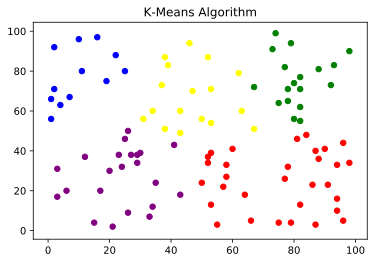

In [6]:
import numpy as np

print("task 6")
def kmeans(a, centroids): #a - массив из n наблюдений по m значений
                          #centroids - текущие центры кластеров(массив из k наблюдений по m значений) 
    print("step")
    k = centroids.shape[0]
    m = a.shape[1]
    clasters = np.argmin(np.linalg.norm(a - centroids[:, None], axis=2), axis=0)
                                                                  #массив содержащий номер кластера для каждого наблюдения
    new_centroids = np.ones((k, m))
    num = np.bincount(clasters)
    for i in range(k):
        new_centroids[i] = a[clasters == i].sum(axis = 0) / num[i]
    if (new_centroids == centroids).all():
        return clasters
    else:
        return kmeans(a, new_centroids)
        
        
n = 100
k = 5
color = ["green", "blue", "yellow", "red", "purple", "black", "thistle"]
a = np.random.randint(1, 100, (n, 2))
centroids = np.ones((k, 2))
centroids = a[0:k].copy()
clasters = kmeans(a, centroids)

import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

print(clasters)
for i in range(k):
    for j in range(n):
        if (clasters[j] == i):
            plt.scatter(a[j, 0], a[j, 1], s=30, c=color[i])
plt.title('K-Means Algorithm')
plt.show() 